In [6]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math
from collections import OrderedDict
# import seaborn as sns

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
client=Client('tcp://10.0.64.18:8786', local_dir='/local/g40/amh157')
client

Client Scheduler: tcp://10.0.64.18:8786 Dashboard: http://10.0.64.18:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
def global_scalar(variable):
    for ekey in exptdata.exptdict.keys():
        expt = exptdata.exptdict[ekey]['expt']
        time_units = exptdata.exptdict[ekey]['time_units']
        offset = exptdata.exptdict[ekey]['offset']
        darray = cc.get_nc_variable(expt,'ocean_scalar.nc',
                                    variable,
                                    time_units=time_units,offset=offset)
        annual_average = darray.resample(time='A').mean()
        annual_average.plot(label=exptdata.exptdict[ekey]['desc'])

    plt.gca().autoscale()

In [4]:
def add_cycles():
    cycle_dates = [1778, 1838, 1898]
    ylims=plt.gca().get_ylim()
    for cd in cycle_dates:
        plt.plot([pd.datetime(cd,1,1),pd.datetime(cd,1,1)],ylims,'k--',linewidth=0.8)
    plt.gca().set_ylim(ylims)

In [5]:
temp=np.loadtxt('aravg.ann.ocean.90S.90N.v4.0.1.201901.asc')
#sst_year = temp[:,0]
#sst_year = sst_year.astype('datetime64')
#for i,year in enumerate(sst_year):
#    print(i, year)
#    sst_year[i] = pd.datetime(year.astype(int),7,1)
sst = temp[:,1] + 18
sst_year = pd.date_range(start='1880-07-01',freq='A',periods=sst.size)
sst_year

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', length=140, freq='A-DEC')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


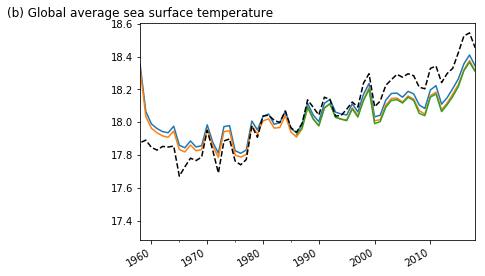

In [9]:
ax=plt.subplot(111)
global_scalar('temp_surface_ave')
plt.xlabel('')
plt.ylabel('')
ax.set_title('(b) Global average sea surface temperature',position=(0.0,1.0))
ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
ax.set_xticks([pd.datetime(1965,1,1), pd.datetime(1975,1,1), pd.datetime(1985,1,1)], minor=True)

ax.plot(sst_year,sst,'k--')
#plt.xlim([1958,2018])

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cook

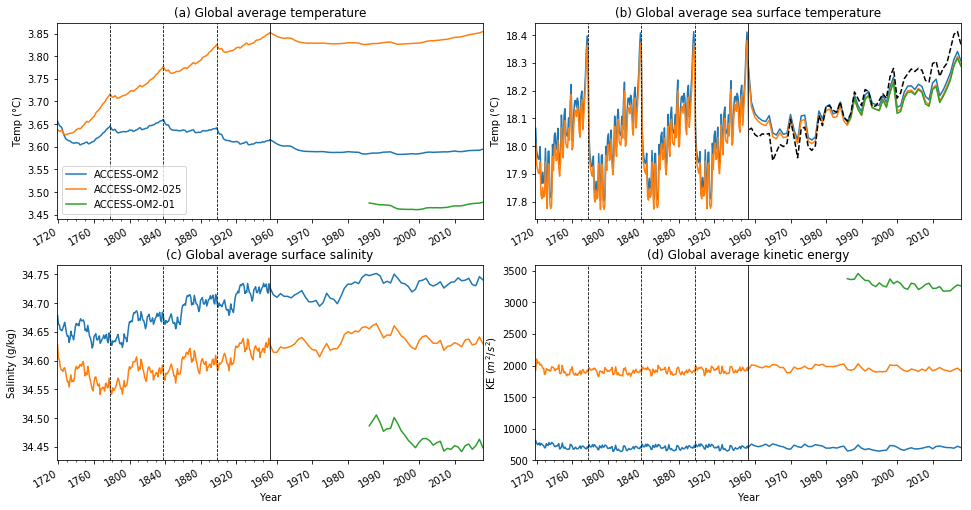

In [10]:
%%time
plt.figure(figsize=(16,8))

#############
## FIRST PLOT
ax = plt.axes([0.125, 0.545,0.185, 0.34])
global_scalar('temp_global_ave')
add_cycles()
plt.legend()
plt.xlabel('')
plt.ylabel('Temp (°C)')
ax.set_xlim([pd.datetime(1718,1,1),pd.datetime(1957,12,31)])
ax.set_xticks([pd.datetime(1730,1,1), pd.datetime(1740,1,1), pd.datetime(1750,1,1), pd.datetime(1770,1,1), 
               pd.datetime(1780,1,1), pd.datetime(1790,1,1), pd.datetime(1810,1,1), pd.datetime(1820,1,1), 
               pd.datetime(1830,1,1), pd.datetime(1850,1,1), pd.datetime(1860,1,1), pd.datetime(1870,1,1),
               pd.datetime(1890,1,1), pd.datetime(1900,1,1), pd.datetime(1910,1,1), pd.datetime(1930,1,1),
               pd.datetime(1940,1,1), pd.datetime(1950,1,1)], minor=True)

ax = plt.axes([0.31, 0.545,0.185, 0.34])
ax.set_yticks([])
global_scalar('temp_global_ave')
plt.xlabel('')
plt.ylabel('')
ax.set_title('(a) Global average temperature',position=(0.0,1.0))
ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])

##############
## SECOND PLOT
ax = plt.axes([0.54, 0.545,0.185, 0.34])
global_scalar('temp_surface_ave')
add_cycles()
plt.xlabel('')
plt.ylabel('Temp (°C)')
ax.set_xlim([pd.datetime(1718,1,1),pd.datetime(1957,12,31)])
ax.set_xticks([pd.datetime(1730,1,1), pd.datetime(1740,1,1), pd.datetime(1750,1,1), pd.datetime(1770,1,1), 
               pd.datetime(1780,1,1), pd.datetime(1790,1,1), pd.datetime(1810,1,1), pd.datetime(1820,1,1), 
               pd.datetime(1830,1,1), pd.datetime(1850,1,1), pd.datetime(1860,1,1), pd.datetime(1870,1,1),
               pd.datetime(1890,1,1), pd.datetime(1900,1,1), pd.datetime(1910,1,1), pd.datetime(1930,1,1),
               pd.datetime(1940,1,1), pd.datetime(1950,1,1)], minor=True)

ax = plt.axes([0.725, 0.545,0.185, 0.34])
ax.set_yticks([])
global_scalar('temp_surface_ave')
plt.xlabel('')
plt.ylabel('')
ax.set_title('(b) Global average sea surface temperature',position=(0.0,1.0))
ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
## Add Obs:
ax.plot(sst_year,sst,'k--')


#############
## THIRD PLOT
ax = plt.axes([0.125, 0.125,0.185, 0.34])
global_scalar('salt_surface_ave')
add_cycles()
plt.xlabel('')
plt.ylabel('Salinity (g/kg)')
ax.set_xlim([pd.datetime(1718,1,1),pd.datetime(1957,12,31)])
ax.set_xticks([pd.datetime(1730,1,1), pd.datetime(1740,1,1), pd.datetime(1750,1,1), pd.datetime(1770,1,1), 
               pd.datetime(1780,1,1), pd.datetime(1790,1,1), pd.datetime(1810,1,1), pd.datetime(1820,1,1), 
               pd.datetime(1830,1,1), pd.datetime(1850,1,1), pd.datetime(1860,1,1), pd.datetime(1870,1,1),
               pd.datetime(1890,1,1), pd.datetime(1900,1,1), pd.datetime(1910,1,1), pd.datetime(1930,1,1),
               pd.datetime(1940,1,1), pd.datetime(1950,1,1)], minor=True)

ax = plt.axes([0.31, 0.125,0.185, 0.34])
ax.set_yticks([])
global_scalar('salt_surface_ave')
plt.ylabel('')
ax.set_title('(c) Global average surface salinity',position=(0.0,1.0))
ax.set_xlabel('Year',position=(0.0,1.0))
ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])

#############
##FOURTH PLOT
ax = plt.axes([0.54, 0.125,0.185, 0.34])
global_scalar('ke_tot')
add_cycles()
plt.xlabel('')
plt.ylabel('KE ($m^2/s^2$)')
ax.set_xlim([pd.datetime(1718,1,1),pd.datetime(1957,12,31)])
ax.set_xticks([pd.datetime(1730,1,1), pd.datetime(1740,1,1), pd.datetime(1750,1,1), pd.datetime(1770,1,1), 
               pd.datetime(1780,1,1), pd.datetime(1790,1,1), pd.datetime(1810,1,1), pd.datetime(1820,1,1), 
               pd.datetime(1830,1,1), pd.datetime(1850,1,1), pd.datetime(1860,1,1), pd.datetime(1870,1,1),
               pd.datetime(1890,1,1), pd.datetime(1900,1,1), pd.datetime(1910,1,1), pd.datetime(1930,1,1),
               pd.datetime(1940,1,1), pd.datetime(1950,1,1)], minor=True)

ax = plt.axes([0.725, 0.125,0.185, 0.34])
ax.set_yticks([])
global_scalar('ke_tot')
plt.ylabel('')
ax.set_title('(d) Global average kinetic energy',position=(0.0,1.0))
ax.set_xlabel('Year',position=(0.0,1.0))
ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])

savefigure('GlobalTimeseries')